**Prediksi Produksi Beras di Pulau Sumatera, Indonesia**

Pulau Sumatera memiliki lebih dari 50 persen lahan pertanian di setiap provinsi dengan komoditi pangan utama yang paling dominan adalah padi, sedangkan komoditi minor lainnya adalah jagung, kacang tanah dan ubi jalar. Hasil pertanian di Pulau Sumatera sangat rentan terhadap perubahan iklim dan dampak negatifnya dapat mempengaruhi pola tanam, waktu tanam, produksi dan kualitas hasil. Selain itu, peningkatan suhu bumi akibat dampak pemanasan global yang akan mempengaruhi pola presipitasi, penguapan, aliran air, kelembaban tanah, dan variasi iklim yang sangat fluktuatif secara keseluruhan dapat mengancam keberhasilan produksi pertanian. .

Data tersebut merupakan catatan informasi terkait dari tahun 1993 sampai dengan tahun 2020 meliputi 8 provinsi di Pulau Sumatera, yaitu Nanggroe Aceh Darussalam, Sumatera Utara, Sumatera Barat, Riau, Jambi, Sumatera Selatan, Bengkulu dan Lampung.

**Tujuan** : Memprediksi produksi beras di Pulau Sumatera berdasarkan akumulasi data selama 28 tahun sebelumnya.

# 1. Load **Dataset**

In [1]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data tanaman padi sumatra.csv')
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,suhu rata-rata class
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06,>25
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92,>25
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27,>25
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08,>25
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31,>25
...,...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45,>25
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36,>25
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50,>25
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23,>25


In [ ]:
#Cek Baris dan Kolom
data.shape

(224, 7)

Total data adalah 224 yang mana untuk setiap provinsi memiliki 28 data tahunan.

Dataset terdiri dari atribut berikut:

**Provinsi:** Nama provinsi

**Tahun**: Tahun produksi padi

**Produksi**: Hasil produksi atau panen tahunan (ton)

**Luas Tanah**: Luas Pertanian (hektar)

**Curah hujan**: Jumlah rata-rata curah hujan dalam setahun (milimeter)

**Kelembaban**: Tingkat kelembaban rata-rata dalam setahun (persentase)

**Suhu Rata-Rata**: Derajat suhu rata-rata dalam setahun (celsius)

Atribut nomor 1 - 4 dikumpulkan dari Database Badan Pusat Statistik Indonesia, dan atribut lainnya dikumpulkan dari Database Badan Meteorologi, Klimatologi, dan Geofisika Indonesia

In [ ]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


# 2. Analisis dan Eksplorasi

In [ ]:
#Mencari data mengenai misiing values
#Ternyata data kita tidak ada missing values
data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [ ]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Hasil rata-rata di 8 Provinsi selama 28 tahun adalah 1679700.887 ton dengan hasil terendah 42938 ton. Rata-rata luas lahan pertanian adalah 374350 hektar.

Dari uraian diatas terlihat bahwa nilai rata-rata dan median dari masing-masing atribut tidak jauh berbeda. Sehingga dapat dikatakan bahwa data tersebut berdistribusi normal.

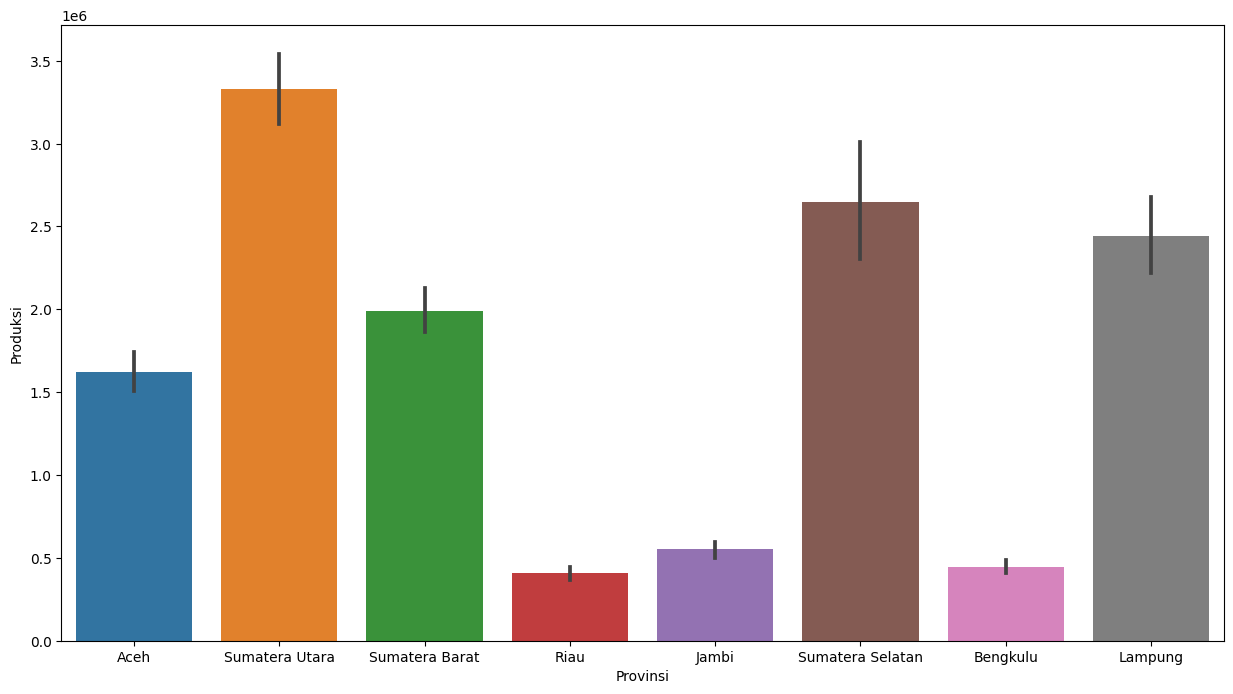

In [7]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Provinsi', y='Produksi', data=data)
plt.show()

Sumatera Utara memiliki produksi hasil tertinggi dalam dataset.

In [ ]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


a. Distribusi Jumlah Produksi

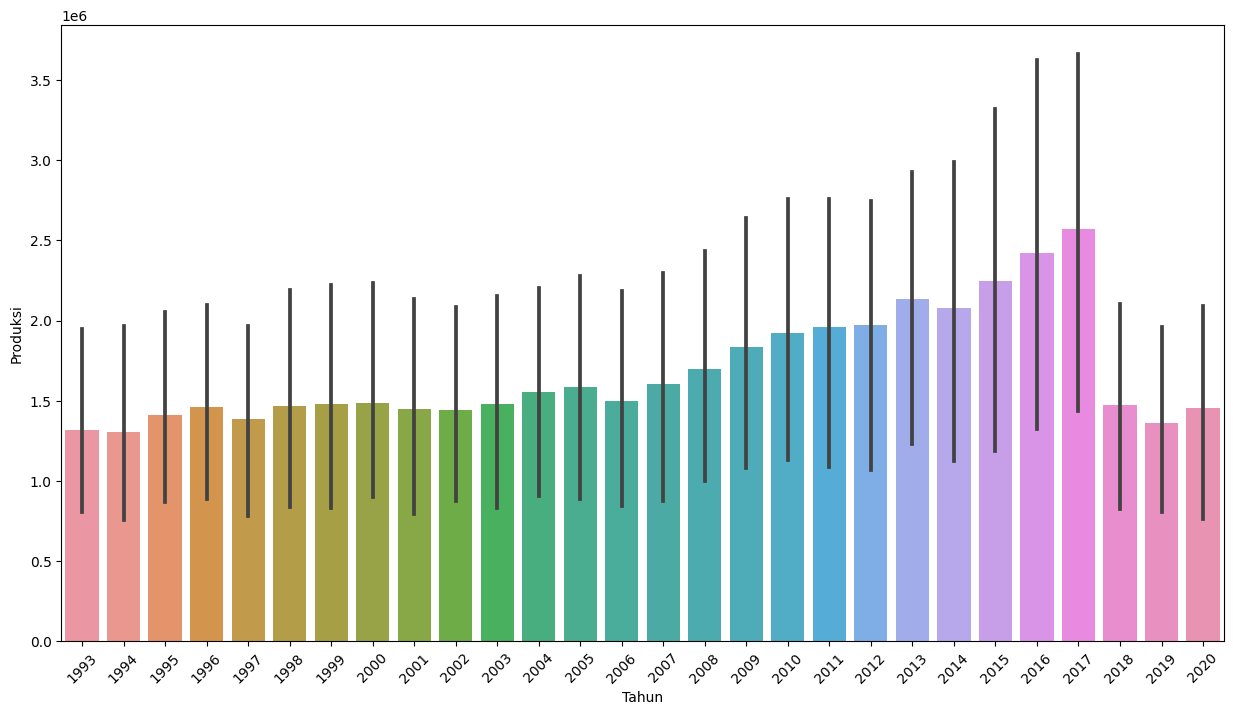

In [10]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Tahun', y='Produksi', data=data)
plt.xticks(rotation=45)
plt.show()

Tahun dengan produksi terbesar terjadi pada tahun 2017, namun pada tahun-tahun berikutnya produksi mengalami penurunan yang cukup signifikan.

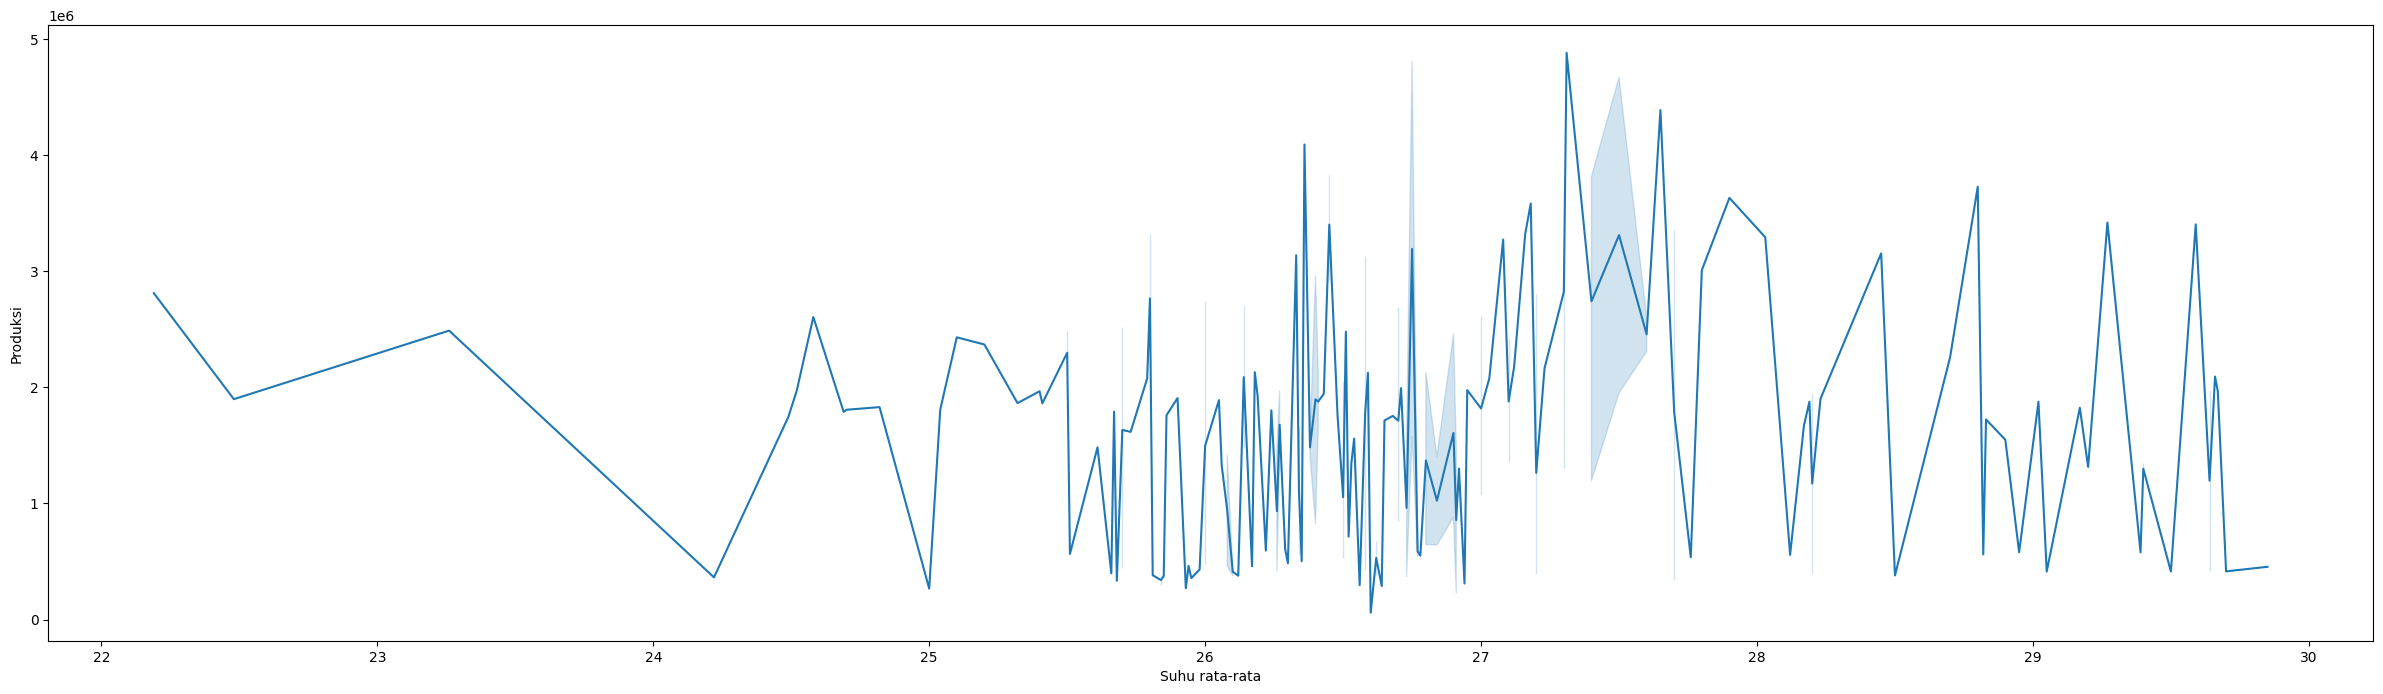

In [11]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Suhu rata-rata', y='Produksi', data=data)
plt.show()

In [ ]:
Produksi maksimal terjadi saat suhu rata-rata berada di kisaran 27-28 derajat Celcius.

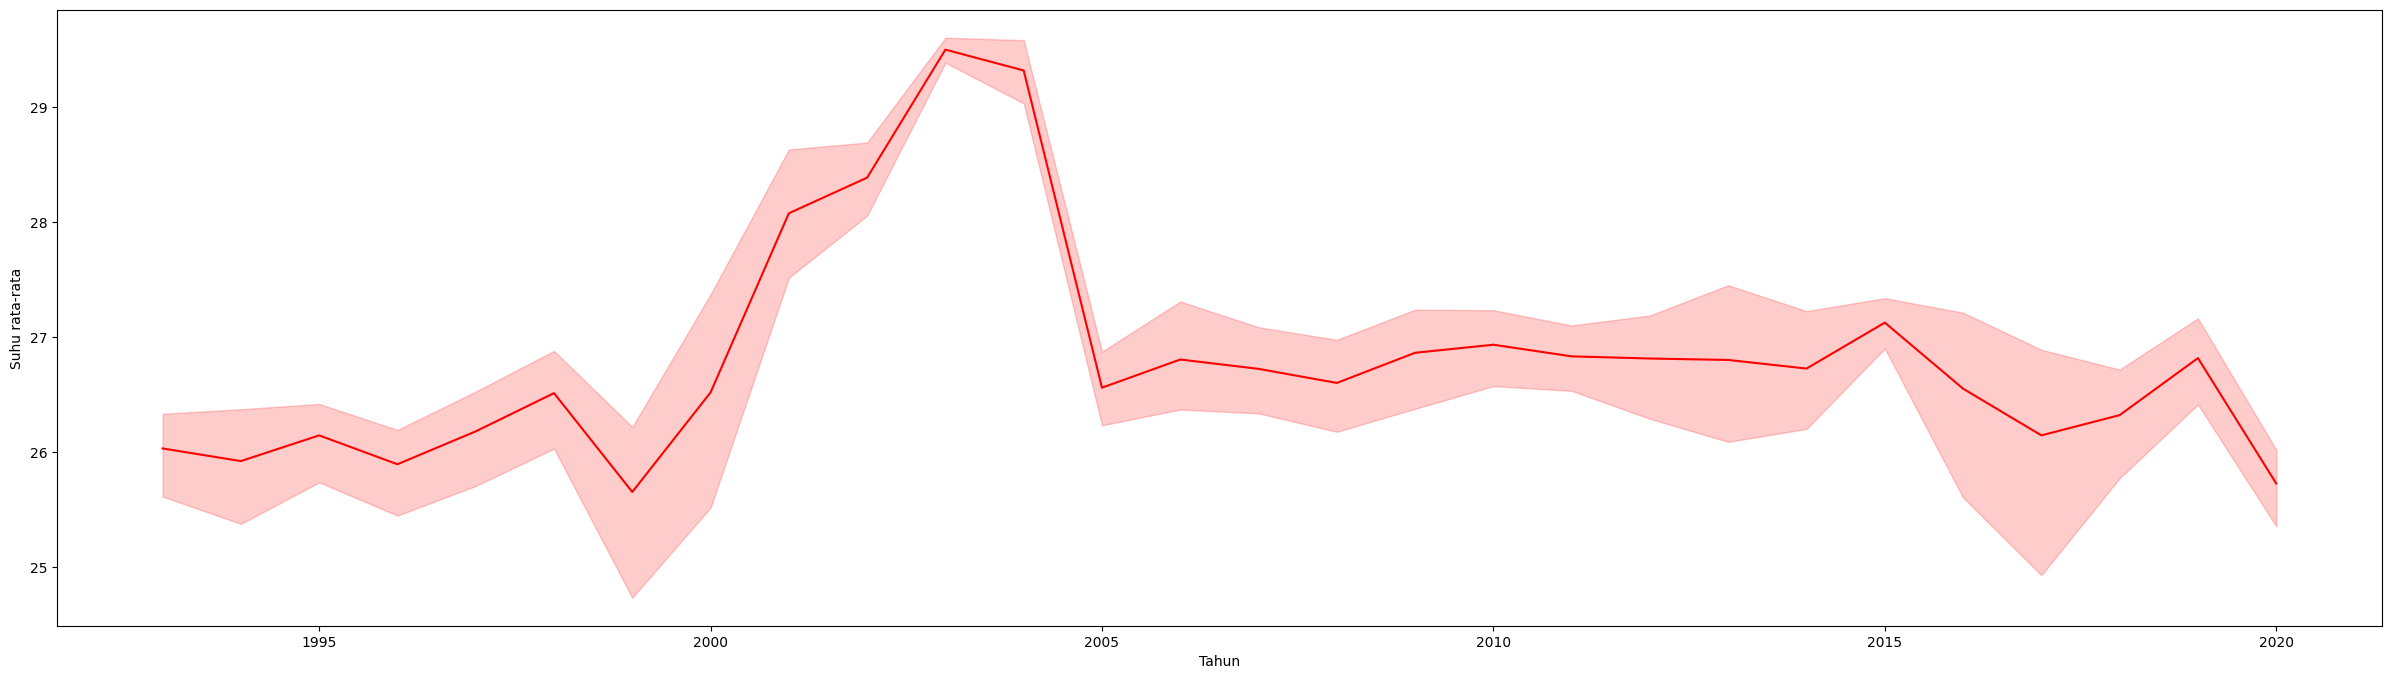

In [12]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Tahun', y='Suhu rata-rata', data=data, color='red')
plt.show()

Suhu rata-rata tertinggi pernah dicapai pada tahun 2000-2005 yaitu lebih dari 29 derajat Celcius, namun pada tahun-tahun berikutnya cenderung stabil pada kisaran suhu 27 derajat Celcius.

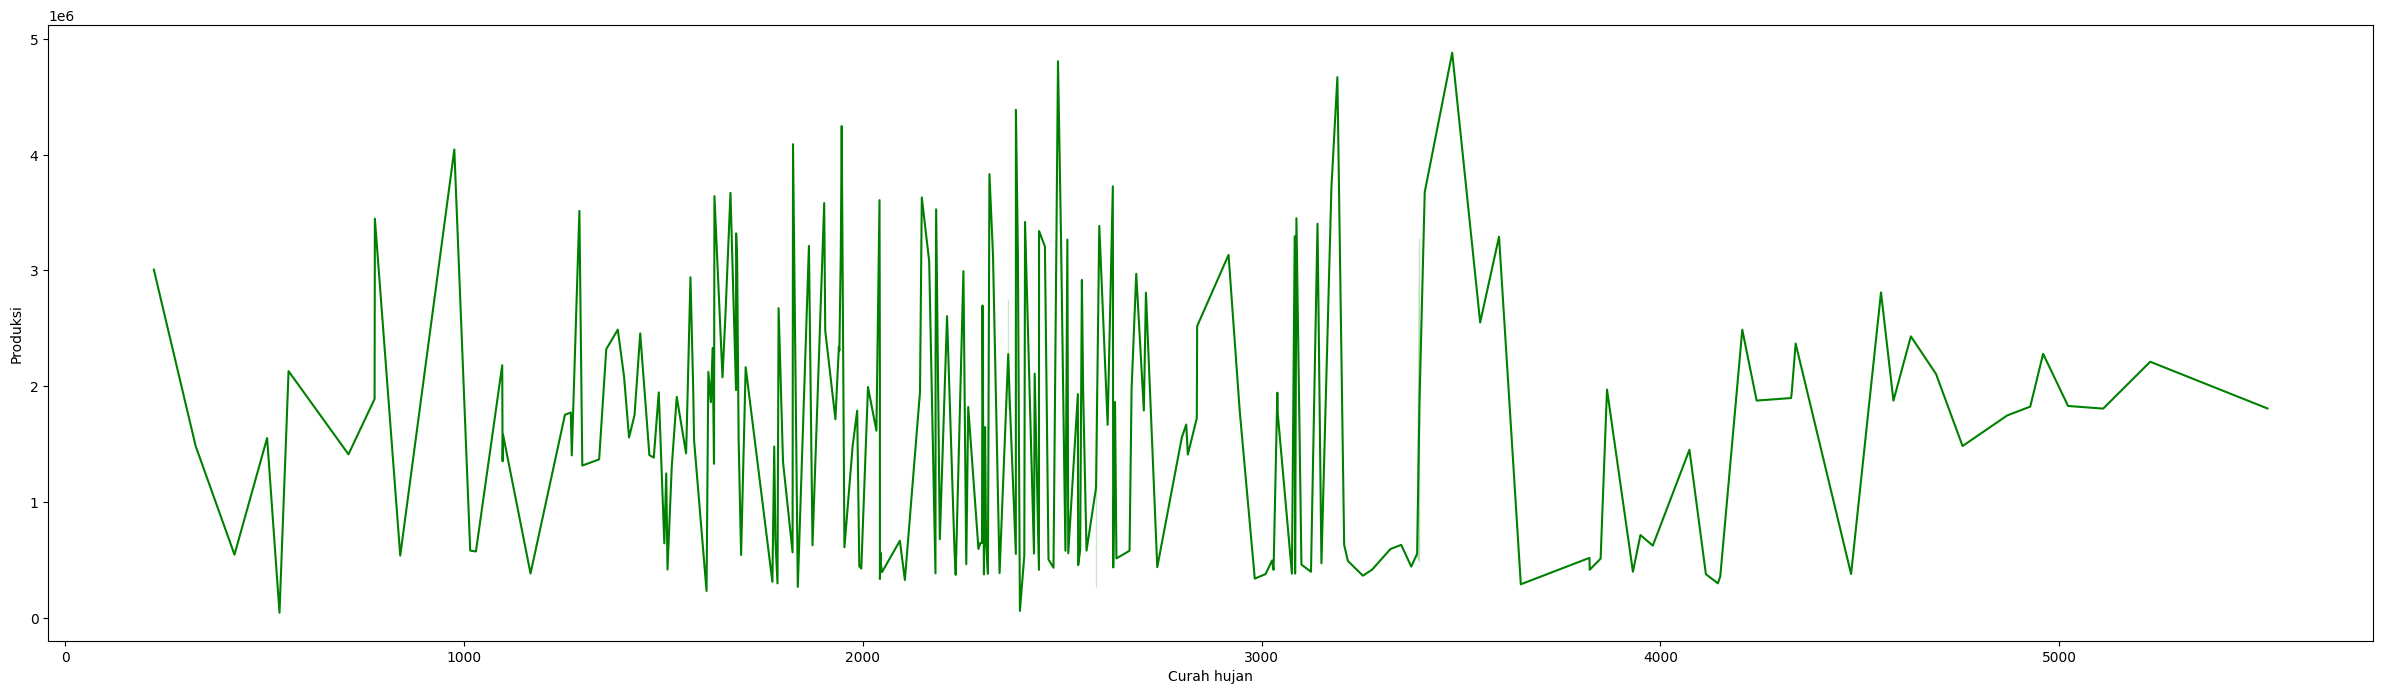

In [14]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Curah hujan', y='Produksi', data=data, color='green')
plt.show()

Dapat dikatakan bahwa produksi dapat lebih stabil pada curah hujan sedang, yaitu sekitar 2500mm per tahun.

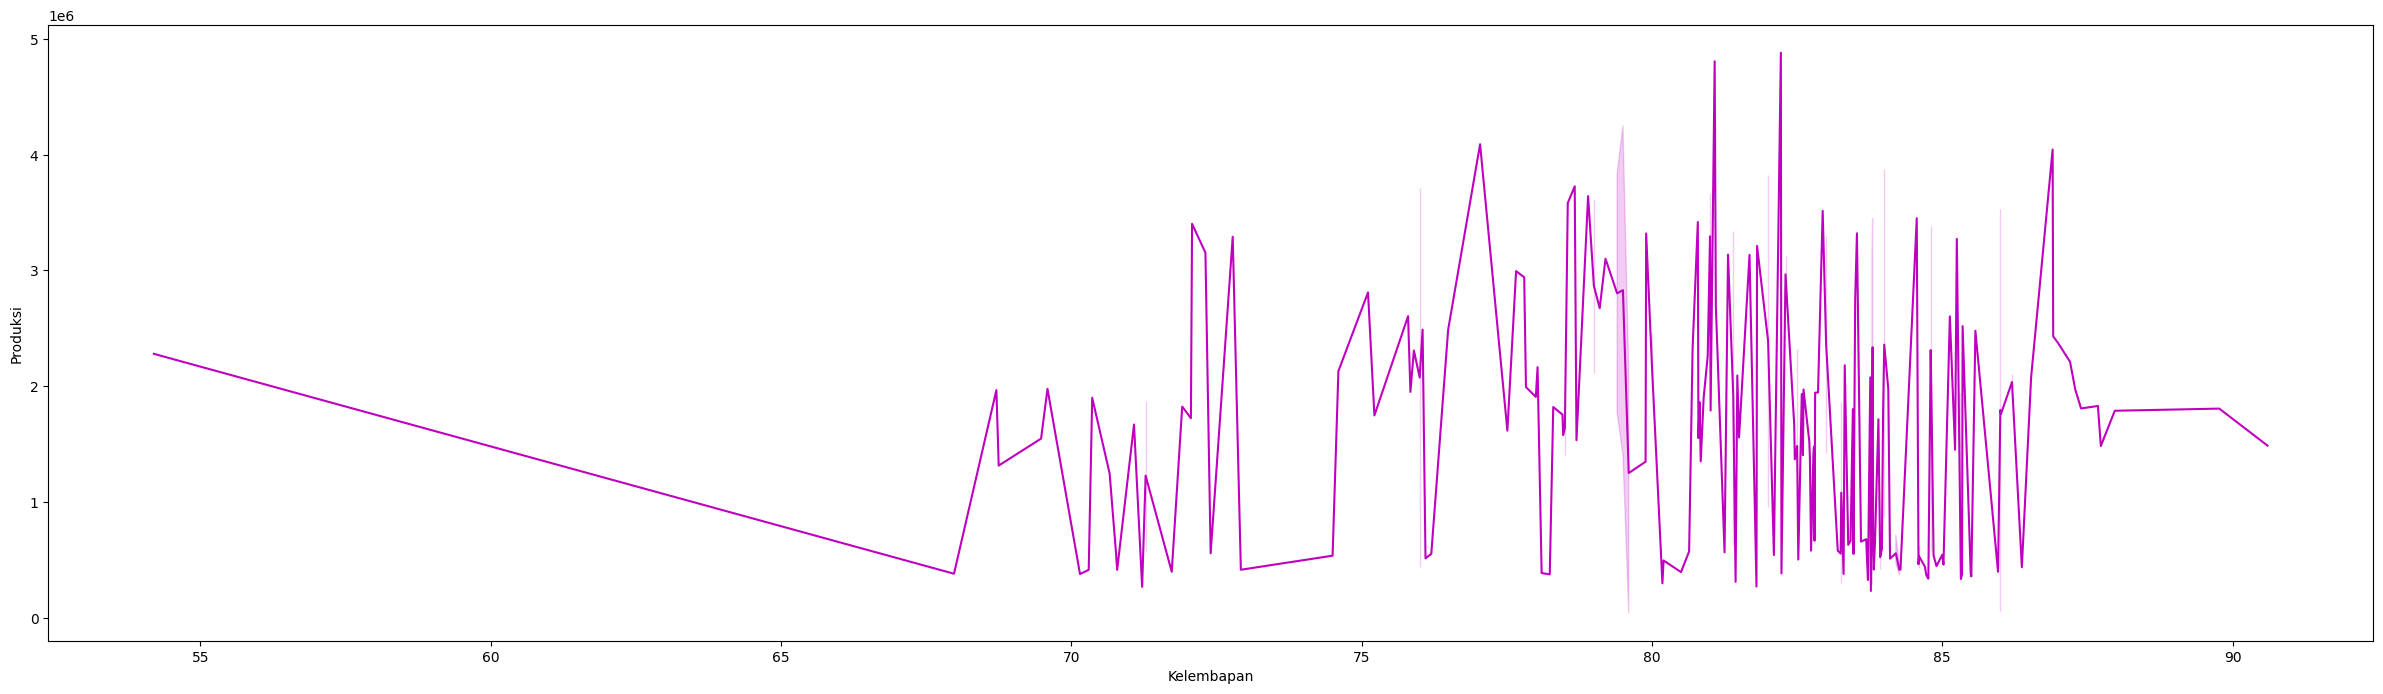

In [15]:
plt.figure(figsize=(30, 8))
sns.lineplot(x='Kelembapan', y='Produksi', data=data, color='m')
plt.show()

Pada tingkat kelembapan sekitar 80-85%, produksi terlihat lebih optimal dan stabil.

Berdasarkan tujuan notebook ini, maka atribut yang akan menjadi output adalah panen (kolom = Produksi).

In [ ]:
#statistical plot
import scipy.stats as stats
import pylab as py

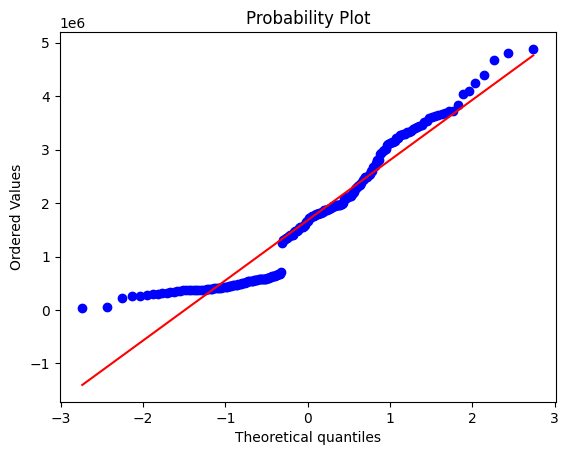

In [ ]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

 QQ-plot di atas menunjukkan bagaimana distribusi data dari variabel terpilih yaitu variabel Produksi. Plot di atas merupakan plot nilai kuantil teoritis dengan nilai kuantil dari variabel yang dipilih. Jadi, plot akan menggambarkan berapa banyak nilai dalam suatu distribusi berada di atas atau di bawah batas tertentu.Data hasil plot diatas diperoleh garis-garis yang cenderung lurus yang berarti bahwa secara keseluruhan sebaran data variable-vaeriable tersebut cenderung normal

In [ ]:
data.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [ ]:
#Mengubah urutan kolom
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


# 3. Data Prepocessing

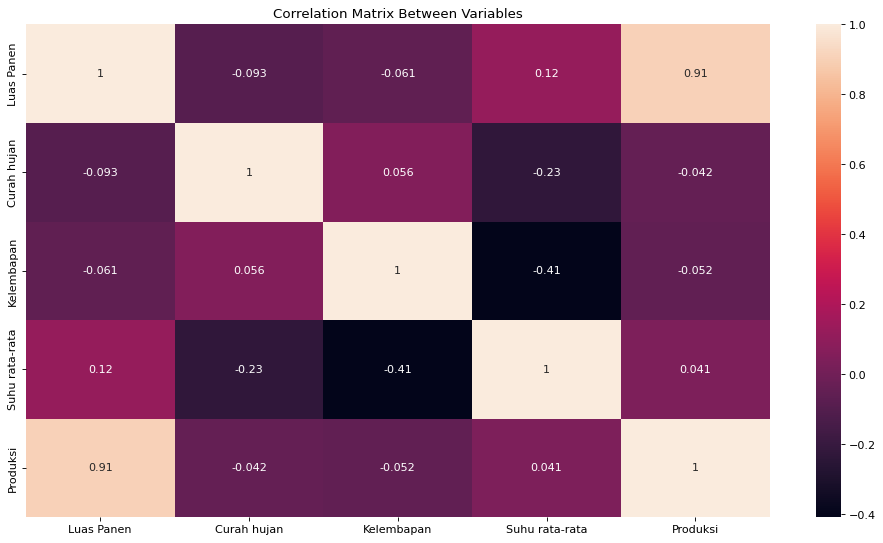

In [ ]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Produksi'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Variables')
plt.show()

Luas lahan pertanian dan suhu rata-rata memiliki nilai yang positif, artinya semakin besar nilai variable bebas tersebut maka produksi juga akan meningkat walaupun tidak signifikan (pengaruh suhu). Sedangkan variable curah hujan dan kelembaban memiliki nilai korelasi yang negatif , artinya semakin kecil kedua variable tersebut maka produksi akan meningkat(pergerakan grafik bergerak terbalik), meskipun hubungannya tidak terlalu erat.

Multikolinearitas adalah keadaan yang menunjukkan adanya korelasi atau hubungan yang kuat antara dua atau lebih variabel independen dalam suatu model regresi yang akan mempengaruhi stabilitas dan akurasi model. Salah satu cara untuk mendeteksi adanya multikolinearitas dalam model regresi adalah dengan melihat kekuatan korelasi antar variabel independen. Jika terdapat korelasi antar variabel independen > 0,8 maka dapat mengindikasikan adanya multikolinearitas.

Jadi, dari matriks di atas dapat disimpulkan bahwa tidak ditemukan adanya multikolinearitas.

# Train and Test Split

Dataset akan dipecah menjadi dua dataset, dataset training dan dataset test. Data biasanya cenderung dibagi ketidaksetaraan karena pelatihan model biasanya membutuhkan titik data sebanyak mungkin. Pemisahan yang umum adalah 70/30 atau 80/20 untuk pelatihan/tes.

Dataset pelatihan adalah dataset awal yang digunakan untuk melatih algoritma ML untuk mempelajari dan menghasilkan prediksi yang tepat. (70% dari dataset adalah dataset pelatihan).

Namun, set data pengujian digunakan untuk menilai seberapa baik algoritme ML dilatih dengan set data pelatihan. Kami tidak bisa begitu saja menggunakan kembali dataset pelatihan dalam tahap pengujian karena algoritme ML sudah akan "mengetahui" keluaran yang diharapkan, yang mengalahkan tujuan pengujian algoritme. (30% dari kumpulan data sedang menguji kumpulan data).

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,323589.0,1627.0,82.00,26.06,1329536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,329041.0,1521.0,82.12,26.92,1299699.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,339253.0,1476.0,82.72,26.27,1382905.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,348223.0,1557.0,83.00,26.08,1419128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,337561.0,1339.0,82.46,26.31,1368074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop(columns='Tahun')
df.tail()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,390799.00,2317.6,79.40,26.45,3831923.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,396559.00,1825.1,77.04,26.36,4090654.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,511940.93,1385.8,76.05,25.50,2488641.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,464103.42,1706.4,78.03,27.23,2164089.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,545149.05,2211.3,75.80,24.58,2604913.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [ ]:
x_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
x_train[:5]

array([[ 7.16699915e-01, -8.39566916e-01,  9.37541781e-01,
         6.92312495e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01,  2.76887462e+00, -4.05190208e-01],
       [ 1.92735709e+00, -1.70505807e+00,  6.36262189e-01,
         2.09231762e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01,  2.46797672e+00],
       [-2.18952945e-01, -1.97116607e+00, -4.33158388e-02,
        -8.15456793e-03,  2.76887462e+00, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-9.09690355e-01,  1.21023610e-04, -2.19984345e+00,
         2.13350335e+00, -3.61157559e-01, -4.05190208e-01,
         2.60768096e+00, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-1.05176751e+00, -2.70812770e-01,  7.4046415

In [ ]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [ ]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [ ]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [ ]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 4. Modeling

In [ ]:
#pemodelan
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#lakukan invers untuk mengembalikan ke nilai semula (karena sudah distandarkan sebelumnya)
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


<ipython-input-38-cfade503f485>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
<ipython-input-38-cfade503f485>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_LinReg, hist=False, label='Predicted')


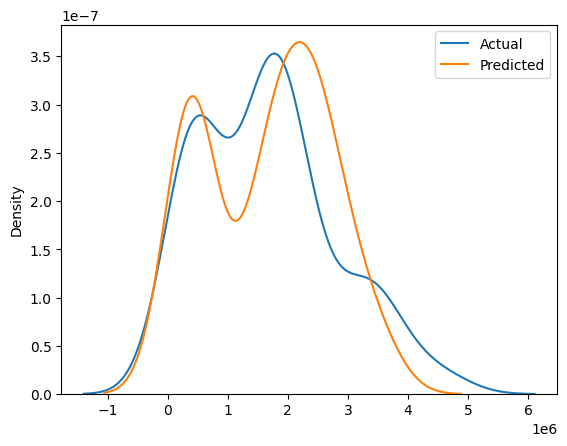

In [ ]:
#memvisualisasikan prediksi
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [ ]:
#Periksa keakuratan pengujian dan pelatihan model Regresi Linier
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Menilai kinerja metode Regresi Linier dengan membagi data sampel dengan 10 kali lipat secara acak
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524144 

The Average Cross Validation Score is 82.9


# 5. Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg)]

#Mengurutkan model berdasarkan skor-R2
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.372761,270894.361755,166592264074.399628


Hasil model dengan algoritma Linear Regression memiliki R2-score 86.3728 lebih tinggi dibanding model lain sehingga model ini dapat menjadi pilihan terbaik untuk digunakan dalam memprediksi produksi pertanian di Sumatra.